## Digit Recognition Unleashed: Mastering the MNIST Project with Deep Learning

**Introduction:**<br>
In the expansive realm of deep learning, the MNIST dataset stands as a benchmark for testing the mettle of models in handwritten digit recognition. In this blog, we embark on an insightful journey into the MNIST project, unraveling the steps involved in harnessing the power of deep learning to accurately classify handwritten digits. From the collection of data to the intricate process of model building, training, and testing, we delve into the nuances of this fundamental yet transformative project.

In [1]:
# Import Libararies 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import mnist

**Data Collection:**<br>
The MNIST dataset, a treasure trove of 28x28 pixel grayscale images, serves as the foundational element of our project. Comprising 60,000 training images and 10,000 test images, MNIST encapsulates the elegance of handwritten digits. These images, meticulously labeled from 0 to 9, form the canvas on which our deep learning model will learn to recognize and classify digits.

In [4]:
# Load MNIST Dataset 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

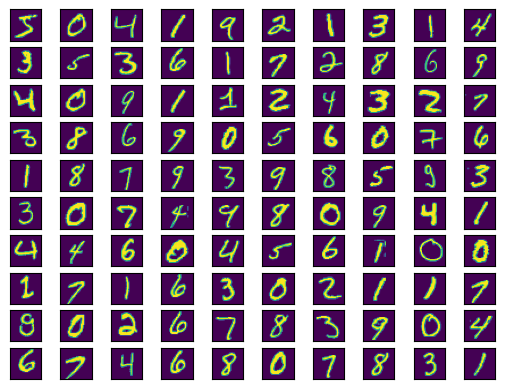

In [8]:
# Display Images

for i in range(100) :
    plt.subplot(10, 10, i+1)              # x, y, position
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])

**Data Preprocessing:**<br>
Before our deep learning model can embark on its learning journey, the MNIST dataset undergoes crucial preprocessing steps:

*Normalizing Pixel Values:* Scaling the pixel values of the images between 0 and 1 ensures uniformity, aiding the convergence of the neural network during training.

*Encoding Class Labels:* The digits 0 to 9 are one-hot encoded, transforming categorical labels into a binary matrix, facilitating the model's understanding of the target classes.

*Structuring Data for Model Input:* Reshaping the data to a suitable format (28x28 pixels) ensures compatibility with the input layer of the neural network.

In [9]:
# grey scale images : 0 to 255 => Scaling => divide all pixel values by 255.

In [16]:
X_train = x_train / 255
X_test = x_test / 255

In [17]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [18]:
# Convert 3 D data into 2 D Data 
# X_train => converting (60000, 28, 28) => (60000, 784)

28 * 28

784

In [20]:
X_train_ = X_train.reshape([60000, 784])
X_test_ = X_test.reshape([10000, 784])

In [21]:
X_train_.shape, X_test_.shape

((60000, 784), (10000, 784))

**Crafting the Neural Network:**<br>
The neural network architecture is the beating heart of our digit recognition project. Comprising layers of neurons, activation functions, and weight adjustments, the neural network is designed to mimic the human brain's ability to learn and recognize patterns. For MNIST, a simple feedforward neural network or a more sophisticated convolutional neural network (CNN) can be employed.

#### Neural Network Architecture for MNIST:

Input Layer (784 neurons) -> Hidden Layer(s) -> Output Layer (10 neurons, one for each digit)

In [22]:
# Build a Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop

In [35]:
model = Sequential()

In [36]:
# Add first Hidden Layer : Neurons =  128

model.add(Dense(units= 128, activation= 'relu', input_shape = (784, ) ))

# Hiiden Layer - 2 : Neurons = 64

model.add(Dense(units= 64, activation= 'relu'))

# Hidden Layer - 3: Neurons = 64

model.add(Dense(units= 64, activation='relu'))

# Hidden Layers - 4 : Neurons = 32

model.add(Dense(units = 32, activation= 'relu'))

# Output Layer
model.add(Dense(units= 10, activation='softmax'))


In [ ]:
# Cancer , Diabetes   => 0, 1 => Binary Classifiers   => activation => 'sigmoid' , nodes = 1
# mnist dataset               => 10 classes           => activation =>  'softmax', nodes = 10

In [26]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 115306 (450.41 KB)
Trainable params: 115306 (450.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# Compile the Model

model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics= ['accuracy'])

**Model Testing and Evaluation:**<br>
The true test of the neural network's prowess comes with the MNIST test dataset. The model encounters previously unseen handwritten digits, and its performance is evaluated using metrics like accuracy, precision, recall, and confusion matrices. These metrics quantify the model's ability to generalize and correctly classify digits.

In [38]:
# Train the Model

model.fit(X_train_, y_train,epochs = 25)

Epoch 1/25
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2616 - accuracy: 0.9215
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1088 - accuracy: 0.9676
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0802 - accuracy: 0.9754
Epoch 4/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0652 - accuracy: 0.9799
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0516 - accuracy: 0.9843
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0441 - accuracy: 0.9862
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0350 - accuracy: 0.9891
Epoch 8/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0351 - accuracy: 0.9891
Epoch 9/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0267 - accuracy: 0.9916
Epoch 10/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.027

In [39]:
# Predict the values 

pred_train = np.argmax( model.predict(X_train_), axis = 1)
pred_test = np.argmax( model.predict(X_test_), axis = 1)

313/313 [==============================] - 2s 6ms/step


In [40]:
from sklearn.metrics import accuracy_score

In [ ]:
# Evaluate the model

# accuracy score

print(f"Training Accuracy : {accuracy_score(y_train,pred_train )}")
print(f"Testing  Accuracy : {accuracy_score(y_test,pred_test )}")

**Conclusion:**<br>
The MNIST project with deep learning encapsulates the essence of image classification using neural networks. From the initial data collection to the intricate process of model building, training, and testing, each step contributes to the model's ability to recognize and classify handwritten digits. As we navigate the complexities of digit recognition, the MNIST project exemplifies the transformative potential of deep learning in the realm of artificial intelligence. The fusion of data science and neural networks in projects like MNIST paves the way for advancements in image recognition, shaping the future of technology.